In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.inspection import permutation_importance
import xgboost as xgb
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\asus\Music\Hello_World.csv")
df

,age,gender,education_level,employment_status,monthly_income,credit_utilization_ratio,total_credit_limit,late_payments_6m,transaction_frequency,average_transaction_amount,login_frequency,credit_score_checks,luxury_purchase_ratio,savings_rate,debt_to_income,credit_score
0,40,Male,Bachelor,Unemployed,3075.71,43.882667,12288.470646,5,32,122.927413,13,0,0.279732,0.321871,0.876984,1
1,36,Female,Master,Employed,4224.22,6.276654,11669.772882,4,30,253.398786,11,1,0.624207,0.088496,0.613725,1
2,43,Male,Bachelor,Employed,4037.93,5.464899,16257.911561,2,28,160.690043,14,2,0.153837,0.135432,0.556809,0
3,52,Female,High School,Self-Employed,3257.82,37.897596,15172.362148,3,28,76.059006,19,7,0.200288,0.335633,0.327865,0
4,35,Male,PhD,Employed,4063.68,16.172157,19469.636474,1,54,156.283499,11,2,0.065791,0.281460,0.604514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35,Male,High School,Self-Employed,5692.00,19.248471,22059.799510,1,27,89.745581,12,6,0.033139,0.177800,0.248493,0
49996,36,Female,Bachelor,Employed,5576.83,56.573087,11923.194954,1,43,127.594879,19,2,0.196269,0.146693,0.604514,0
49997,40,Male,Bachelor,Unemployed,4326.97,20.753516,9941.729735,2,36,90.369409,16,3,0.104400,0.259277,0.449366,0
49998,37,Female,Bachelor,Self-Employed,6000.00,44.376491,27748.132322,2,25,131.025516,17,2,0.306811,0.053442,1.285028,0


In [4]:
df.dtypes # to check data type of all the columns

age                             int64
gender                         object
education_level                object
employment_status              object
monthly_income                float64
credit_utilization_ratio      float64
total_credit_limit            float64
late_payments_6m                int64
transaction_frequency           int64
average_transaction_amount    float64
login_frequency                 int64
credit_score_checks             int64
luxury_purchase_ratio         float64
savings_rate                  float64
debt_to_income                float64
credit_score                    int64
dtype: object

In [5]:
# from sklearn.preprocessing import LabelEncoder

# # Categorical columns to encode
# categorical_cols = ['gender', 'education_level', 'employment_status']

# # Dictionary to store mappings
# label_mappings = {}

# # Apply LabelEncoder with mapping
# for col in categorical_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col].astype(str))  # Ensure string type
#     label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Save mapping

# # Print the mappings
# for col, mapping in label_mappings.items():
#     print(f"{col} mapping: {mapping}")


In [6]:
df

,age,gender,education_level,employment_status,monthly_income,credit_utilization_ratio,total_credit_limit,late_payments_6m,transaction_frequency,average_transaction_amount,login_frequency,credit_score_checks,luxury_purchase_ratio,savings_rate,debt_to_income,credit_score
0,40,1,0,3,3075.71,43.882667,12288.470646,5,32,122.927413,13,0,0.279732,0.321871,0.876984,1
1,36,0,2,0,4224.22,6.276654,11669.772882,4,30,253.398786,11,1,0.624207,0.088496,0.613725,1
2,43,1,0,0,4037.93,5.464899,16257.911561,2,28,160.690043,14,2,0.153837,0.135432,0.556809,0
3,52,0,1,2,3257.82,37.897596,15172.362148,3,28,76.059006,19,7,0.200288,0.335633,0.327865,0
4,35,1,3,0,4063.68,16.172157,19469.636474,1,54,156.283499,11,2,0.065791,0.281460,0.604514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35,1,1,2,5692.00,19.248471,22059.799510,1,27,89.745581,12,6,0.033139,0.177800,0.248493,0
49996,36,0,0,0,5576.83,56.573087,11923.194954,1,43,127.594879,19,2,0.196269,0.146693,0.604514,0
49997,40,1,0,3,4326.97,20.753516,9941.729735,2,36,90.369409,16,3,0.104400,0.259277,0.449366,0
49998,37,0,0,2,6000.00,44.376491,27748.132322,2,25,131.025516,17,2,0.306811,0.053442,1.285028,0


Decision Tree Accuracy: 0.8177
Random Forest Accuracy: 0.8755
XGBoost Accuracy: 0.8732


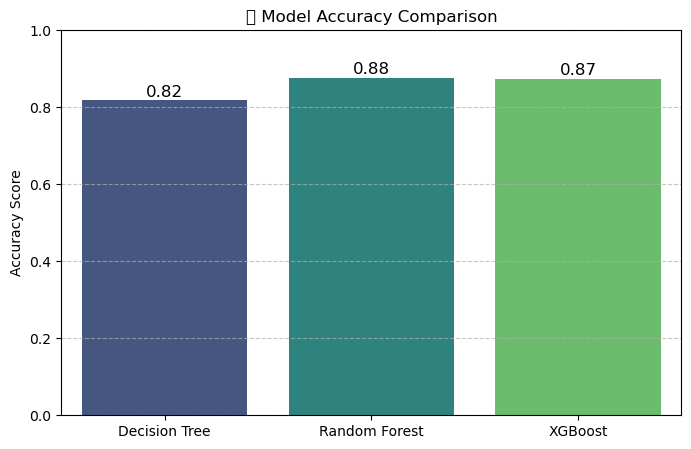

In [7]:
# 📦 Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=['gender', 'education_level', 'employment_status'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('credit_score', axis=1)
y = df_encoded['credit_score']

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# 🧠 Initialize Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 📊 Dictionary to store accuracy
accuracy_scores = {}

# 🔁 Train and Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# 📈 Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title("📊 Model Accuracy Comparison")
plt.ylim(0, 1)
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
plt.ylabel("Accuracy Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

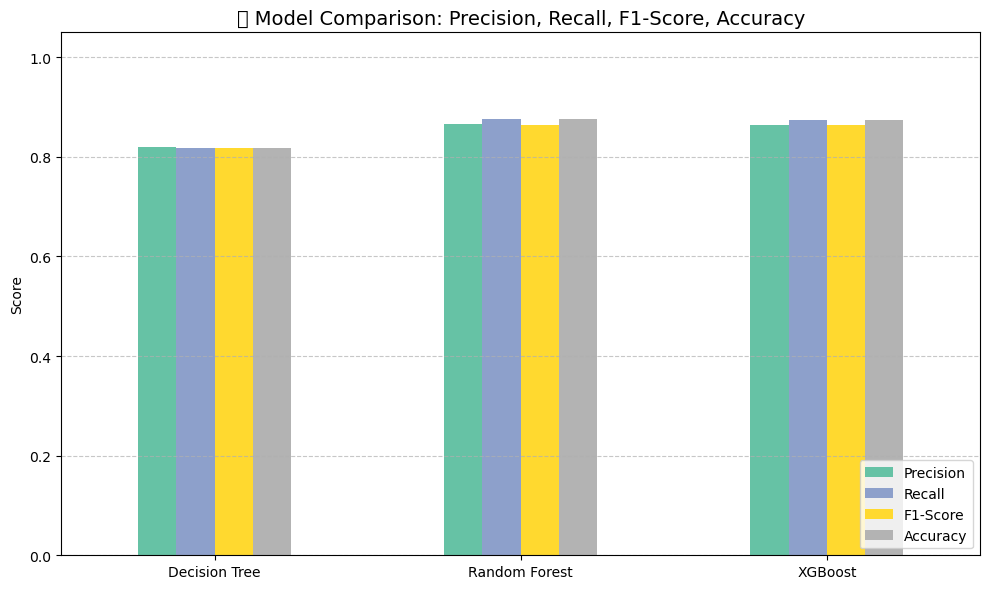

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 🧾 Store results
results = {}

# 📊 Train, predict, and get classification report
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Generate classification report as dict
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract weighted avg metrics
    weighted_avg = report_dict['weighted avg']
    
    # Save precision, recall, f1-score
    results[name] = {
        'Precision': weighted_avg['precision'],
        'Recall': weighted_avg['recall'],
        'F1-Score': weighted_avg['f1-score'],
        'Accuracy': report_dict['accuracy']
    }

# 🐼 Convert to DataFrame for plotting
df_results = pd.DataFrame(results).T  # Transpose for models as rows

# 📈 Plot the comparison
plt.figure(figsize=(10, 6))
df_results.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("📊 Model Comparison: Precision, Recall, F1-Score, Accuracy", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


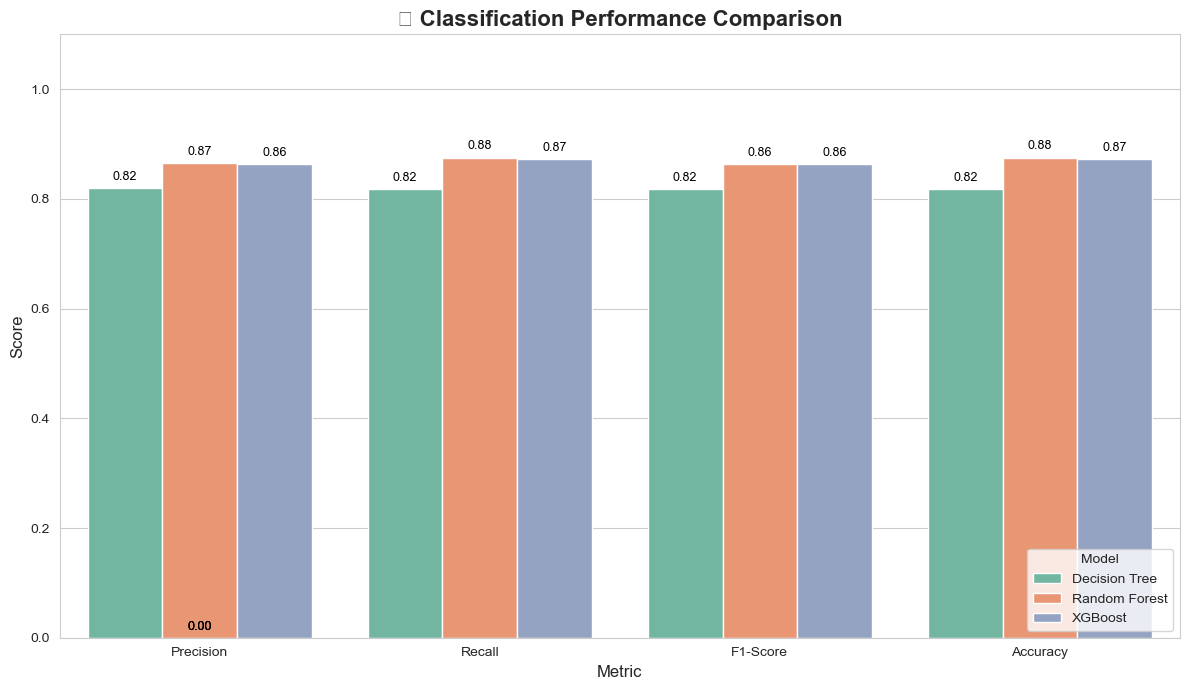

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Step 1: Train Models & Get Classification Report
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    weighted_avg = report_dict['weighted avg']
    
    results[name] = {
        'Precision': weighted_avg['precision'],
        'Recall': weighted_avg['recall'],
        'F1-Score': weighted_avg['f1-score'],
        'Accuracy': report_dict['accuracy']
    }

# Step 2: Prepare DataFrame
df_results = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
df_results_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Step 3: Plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", len(df_results['Model'].unique()))

bar_plot = sns.barplot(data=df_results_melted, x='Metric', y='Score', hue='Model', palette=palette)

# Add text annotations
for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height():.2f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                      textcoords='offset points')

# Styling
plt.title("✨ Classification Performance Comparison", fontsize=16, fontweight='bold')
plt.ylim(0, 1.1)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend(title='Model', loc='lower right')
plt.tight_layout()
plt.show()
